In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA
from sklearn import linear_model

In [2]:
employee = pd.read_csv("lab8data.csv", delimiter = ",")
emp_np = employee[["neuroticism", "performance"]].to_numpy()

In [3]:
mean_vec = np.mean(emp_np, axis=0)
sd_vec = np.std(emp_np, axis=0)

emp_norm = emp_np.copy()

for i in range(2):
    emp_norm[:,i] = (emp_np[:,i] - mean_vec[i]*np.ones(emp_np.shape[0]))/sd_vec[i]

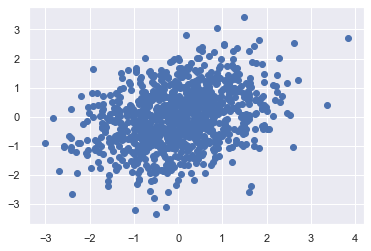

In [5]:
plt.scatter(emp_norm[:,0], emp_norm[:,1])

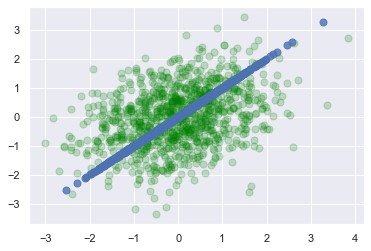

In [6]:
pca1 = PCA(n_components=1)
pca1.fit(emp_norm)

just1 = pca1.transform(emp_norm)

just1_new = pca1.inverse_transform(just1)
plt.scatter(emp_norm[:, 0], emp_norm[:, 1], alpha=0.2, c="green", s=50)
plt.scatter(just1_new[:, 0], just1_new[:, 1], alpha=0.8, s=50)

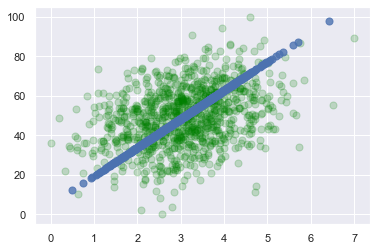

In [7]:
plt.scatter(emp_np[:, 0], emp_np[:, 1], alpha=0.2, c="green", s=50)
plt.scatter(just1_new[:, 0]*sd_vec[0]+mean_vec[0], 
            just1_new[:, 1]*sd_vec[1]+mean_vec[1], alpha=0.8, s=50)

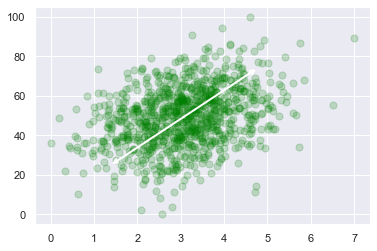

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


plt.scatter(emp_np[:, 0], emp_np[:, 1], alpha=0.2, c="green", s=50)
vector = pca1.components_[0,:]
length = pca1.explained_variance_[0]
v = vector * (-2) * np.sqrt(length) * sd_vec
draw_vector(mean_vec, mean_vec + v)
v2 = vector * (2) * np.sqrt(length) * sd_vec
draw_vector(mean_vec, mean_vec + v2)

In [22]:
m3 = v[1]/v[0]
b3 = mean_vec[1] - m3*mean_vec[0]

In [18]:
neuro = np.array([emp_np[:,0]]).T
perform = np.array([emp_np[:,1]]).T

perform.shape

(1000, 1)

In [19]:
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(neuro,perform)

# Extract the coefficients
m1 = lm1.coef_[0]
b1 = lm1.intercept_

In [20]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(perform,neuro)

# Extract the coefficients
m2 = lm2.coef_[0]
b2 = lm2.intercept_

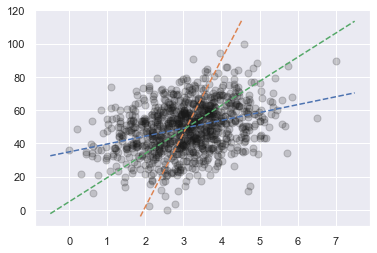

In [29]:
x = np.linspace(-0.5, 7.5, 1000)
y = np.linspace(-4,115,1000)

plt.scatter(emp_np[:, 0], emp_np[:, 1], alpha=0.2, c="k", s=50)

plt.plot(x, m1*x+b1, linestyle='dashed')
plt.plot(m2*y+b2, y, linestyle='dashed')
plt.plot(x, m3*x+b3, linestyle='dashed')